In [1]:
import cv2
import matplotlib.pyplot as plt
import imageio
import numpy as np
import time

In [2]:
#wd
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data


# Exploratory Data Analysis
##Read the data

In [3]:
data = np.load("np_data.npy", allow_pickle=True)
print(data.shape)

(1998, 2)


## Check the length of $X$ and $y$

In [4]:
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
print("The length should be " + str((6984+7000)/7))

1998
1998
The length should be 1997.7142857142858


In [5]:
print(X)
print(y)

[array([133, 130, 115, ...,  71,  59,  71], dtype=uint8), array([ 49,  40,  25, ..., 111, 105,  73], dtype=uint8), array([28, 21, 15, ..., 49, 44, 40], dtype=uint8), array([ 61,  61,  53, ..., 244, 246, 243], dtype=uint8), array([15, 14, 19, ..., 88, 66, 53], dtype=uint8), array([ 1,  1,  1, ..., 18, 14, 11], dtype=uint8), array([91, 61, 63, ..., 29, 20, 67], dtype=uint8), array([250, 187, 143, ..., 100,  99, 104], dtype=uint8), array([26, 25, 31, ..., 14, 15, 20], dtype=uint8), array([36, 32, 20, ..., 38, 30, 17], dtype=uint8), array([ 51,  37,  34, ..., 179, 158, 131], dtype=uint8), array([163, 146, 164, ..., 109,  55, 104], dtype=uint8), array([ 63,  58,  65, ..., 255, 247, 253], dtype=uint8), array([ 53,  41,  29, ..., 164, 180, 196], dtype=uint8), array([110,  32,  32, ..., 188, 149, 180], dtype=uint8), array([29, 18, 52, ..., 13, 14,  8], dtype=uint8), array([ 78,  59,  65, ..., 194, 207, 239], dtype=uint8), array([101,  77,  73, ...,  34,  32,  46], dtype=uint8), array([ 83,  77

## Visualization

In [6]:
"""
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()
"""

'\n# creating the bar plot\nplt.bar(courses, values, color =\'maroon\',\n        width = 0.4)\n \nplt.xlabel("Courses offered")\nplt.ylabel("No. of students enrolled")\nplt.title("Students enrolled in different courses")\nplt.show()\n'

# Machine Learning Task


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Support Vector Machine

In [8]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% for training, 20 for of testing
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='scale', C = 1)) # clf = classifer
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

--- 1559.2773115634918 seconds ---
[[124  83]
 [ 58 135]]


### SVM Confusion Matrix



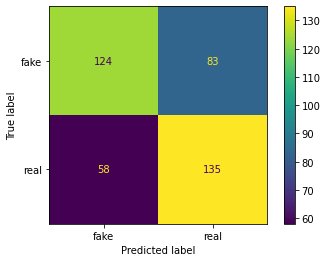

<Figure size 864x576 with 0 Axes>

In [12]:
plot_confusion_matrix(svm_clf, X_test, y_test, values_format = '.0f') 
plt.figure(figsize=(12,8))
plt.show()

### SVM Accuracy Score

In [10]:
print(accuracy_score(y_test, y_pred))

target_names = ['fake', 'real']
print(classification_report(y_test, y_pred, target_names=target_names))

0.6475


## Random Forest Classifier

In [14]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

--- 71.40952587127686 seconds ---
[[120  87]
 [ 67 126]]


### Random Forest Accuracy Score

In [15]:
print(accuracy_score(y_test, y_pred))

0.615


## Logistic Regression

In [18]:
start_time = time.time()
lg_clf = LogisticRegression(random_state=42, C=1)
lg_clf.fit(X_train, y_train)
y_pred = lg_clf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--- 93.69004607200623 seconds ---
[[132  75]
 [ 83 110]]


### Logistic Regression Accuracy Score

In [19]:
print(accuracy_score(y_test, y_pred))

0.605


# References
- https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch05.html#idm45022165153592
- https://github.com/scikit-learn/scikit-learn/issues/16127
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html